In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_s


In [3]:
churn = pd.read_csv('data/churn_train.csv')

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    33472 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   city                    40000 non-null  object 
 5   last_trip_date          40000 non-null  object 
 6   phone                   39681 non-null  object 
 7   signup_date             40000 non-null  object 
 8   surge_pct               40000 non-null  float64
 9   trips_in_first_30_days  40000 non-null  int64  
 10  luxury_car_user         40000 non-null  bool   
 11  weekday_pct             40000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [7]:
churn['last_trip_date'] = pd.to_datetime(churn['last_trip_date'])
churn['signup_date'] = pd.to_datetime(churn['signup_date'])

In [10]:
pd.unique(churn['phone'])

array(['Android', 'iPhone', nan], dtype=object)

In [12]:
churn[churn['phone'].isnull()]

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
152        5.50                   4.8                   4.3       1.04   
178       12.68                   5.0                   NaN       2.00   
216        8.21                   5.0                   5.0       1.00   
239        6.52                   5.0                   4.0       1.00   
387        1.66                   4.5                   5.0       1.00   
...         ...                   ...                   ...        ...   
39234     12.63                   5.0                   NaN       1.00   
39305      9.35                   4.9                   4.8       1.02   
39444      5.93                   5.0                   5.0       1.00   
39515     34.22                   5.0                   4.7       1.00   
39613      2.29                   5.0                   NaN       1.00   

                 city last_trip_date phone signup_date  surge_pct  \
152    King's Landing     2014-06-28   NaN  2014-01-27        7.7   
178           Astapor     2014-01-12   NaN  2014-01-12      100.0   
216        Winterfell     2014-01-09   NaN  2014-01-09        0.0   
239           Astapor     2014-05-28   NaN  2014-01-08        0.0   
387        Winterfell     2014-06-06   NaN  2014-01-17        0.0   
...               ...            ...   ...         ...        ...   
39234      Winterfell     2014-01-28   NaN  2014-01-28        0.0   
39305      Winterfell     2014-06-29   NaN  2014-01-19        7.1   
39444         Astapor     2014-01-31   NaN  2014-01-29        0.0   
39515      Winterfell     2014-05-30   NaN  2014-01-15        0.0   
39613         Astapor     2014-01-09   NaN  2014-01-08        0.0   

       trips_in_first_30_days  luxury_car_user  weekday_pct  
152                         1             True         76.9  
178                         1            False          0.0  
216                         1             True        100.0  
239                         0             True        100.0  
387                         1            False        100.0  
...                       ...              ...          ...  
39234                       1            False        100.0  
39305                       5             True         50.0  
39444                       1             True        100.0  
39515                       0            False        100.0  
39613                       1            False        100.0  

[319 rows x 12 columns]

In [13]:
churn['phone'].fillna('Other', inplace = True)

In [14]:
pd.unique(churn['phone'])

array(['Android', 'iPhone', 'Other'], dtype=object)

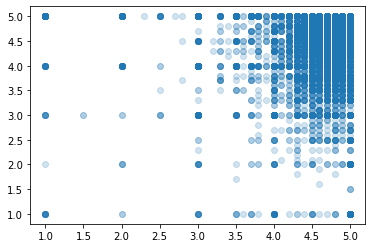

In [17]:
plt.scatter(churn['avg_rating_by_driver'], churn['avg_rating_of_driver'], alpha = 0.2)

In [21]:
drop_idx = churn[(churn['avg_rating_by_driver'].isnull()) & (churn['avg_rating_of_driver'].isnull())].index

In [22]:
churn = churn.drop(index = drop_idx, axis = 1)

In [26]:
churn['retention'] =(churn['last_trip_date'] >= '2014-06-01')

In [28]:
churn.avg_rating_by_driver.mean()

4.777433606104486

In [29]:
churn.avg_rating_of_driver.mean()

4.601696940726505

In [30]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39943 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                39943 non-null  float64       
 1   avg_rating_by_driver    39838 non-null  float64       
 2   avg_rating_of_driver    33472 non-null  float64       
 3   avg_surge               39943 non-null  float64       
 4   city                    39943 non-null  object        
 5   last_trip_date          39943 non-null  datetime64[ns]
 6   phone                   39943 non-null  object        
 7   signup_date             39943 non-null  datetime64[ns]
 8   surge_pct               39943 non-null  float64       
 9   trips_in_first_30_days  39943 non-null  int64         
 10  luxury_car_user         39943 non-null  bool          
 11  weekday_pct             39943 non-null  float64       
 12  retention               39943 non-null  bool  

In [35]:
pd.plotting.scatter_matrix(churn)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [ ]:
plt.bar(churn['avg_rating_by_driver'], churn['retention'])

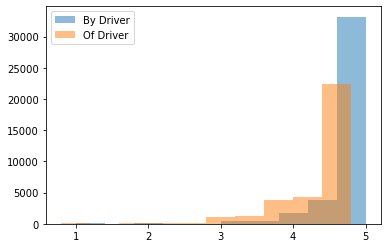

In [40]:
plt.hist(churn['avg_rating_by_driver'], alpha = 0.5, label="By Driver")
plt.hist(churn['avg_rating_of_driver'], align = 'left', alpha = 0.5, label="Of Driver")
plt.legend()
plt.show()

In [66]:
def threshold_calc(col):
    thresholds = np.linspace(5, 1, num = 41)
    # print(thresholds)
    lst = []

    for threshold in thresholds:
        total = (col >= threshold).sum()
        percent = total/len(col)
        lst.append([threshold, total, percent])

    return np.array(lst)

In [69]:
lst = threshold_calc(churn['avg_rating_of_driver'])

for j in range(6):
    print(lst[j][0], lst[j][1], lst[j][2])

5.0 16577.0 0.41501639836767396
4.9 18002.0 0.45069223643692263
4.8 19950.0 0.4994617329694815
4.7 21504.0 0.5383671732218411
4.6 22416.0 0.5611997095861603
4.5 24389.0 0.6105950980146709


In [70]:
by_ = threshold_calc(churn['avg_rating_by_driver'])

for j in range(6):
    print(by_[j][0], by_[j][1], by_[j][2])

5.0 22808.0 0.5710136945146834
4.9 25273.0 0.6327266354555241
4.8 28864.0 0.7226297473900308
4.7 31536.0 0.7895250732293518
4.6 33177.0 0.8306086172796234
4.5 35135.0 0.879628470570563


In [74]:
churn.corr()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  \
avg_dist                1.000000              0.082303              0.036917   
avg_rating_by_driver    0.082303              1.000000              0.118703   
avg_rating_of_driver    0.036917              0.118703              1.000000   
avg_surge              -0.079807              0.007859             -0.033829   
surge_pct              -0.102800              0.018849             -0.010436   
trips_in_first_30_days -0.136215             -0.039282             -0.013720   
luxury_car_user         0.026608              0.010300              0.001759   
weekday_pct             0.097287              0.021552              0.013224   
retention              -0.094976             -0.027461             -0.012902   

                        avg_surge  surge_pct  trips_in_first_30_days  \
avg_dist                -0.079807  -0.102800               -0.136215   
avg_rating_by_driver     0.007859   0.018849               -0.039282   
avg_rating_of_driver    -0.033829  -0.010436               -0.013720   
avg_surge                1.000000   0.793497               -0.001680   
surge_pct                0.793497   1.000000                0.005059   
trips_in_first_30_days  -0.001680   0.005059                1.000000   
luxury_car_user         -0.075575  -0.103726                0.114614   
weekday_pct             -0.112789  -0.147626                0.049522   
retention               -0.003346   0.011419                0.210893   

                        luxury_car_user  weekday_pct  retention  
avg_dist                       0.026608     0.097287  -0.094976  
avg_rating_by_driver           0.010300     0.021552  -0.027461  
avg_rating_of_driver           0.001759     0.013224  -0.012902  
avg_surge                     -0.075575    -0.112789  -0.003346  
surge_pct                     -0.103726    -0.147626   0.011419  
trips_in_first_30_days         0.114614     0.049522   0.210893  
luxury_car_user                1.000000     0.033185   0.206845  
weekday_pct                    0.033185     1.000000   0.008472  
retention                      0.206845     0.008472   1.000000

In [80]:
churn[churn['avg_rating_of_driver'].isnull()]['retention'].sum()/len(churn[churn['avg_rating_of_driver'].isnull()]['retention'])

0.20244166280327616

In [79]:
churn[~churn['avg_rating_of_driver'].isnull()]['retention'].sum()/len(churn[~churn['avg_rating_of_driver'].isnull()]['retention'])

0.40932719885277247

In [81]:
churn[churn['avg_rating_by_driver'].isnull()]['retention'].sum()/len(churn[churn['avg_rating_by_driver'].isnull()]['retention'])

0.10476190476190476

In [82]:
churn[~churn['avg_rating_by_driver'].isnull()]['retention'].sum()/len(churn[~churn['avg_rating_by_driver'].isnull()]['retention'])

0.3765249259500979

In [85]:
churn.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      6.94                   5.0                   5.0       1.00   
1      8.06                   5.0                   5.0       1.00   
2     21.50                   4.0                   NaN       1.00   
3      9.46                   5.0                   NaN       2.75   
4     13.77                   5.0                   NaN       1.00   

         city last_trip_date    phone signup_date  surge_pct  \
0     Astapor     2014-05-03  Android  2014-01-12        0.0   
1     Astapor     2014-01-26  Android  2014-01-25        0.0   
2  Winterfell     2014-05-21   iPhone  2014-01-02        0.0   
3  Winterfell     2014-01-10  Android  2014-01-09      100.0   
4  Winterfell     2014-05-13   iPhone  2014-01-31        0.0   

   trips_in_first_30_days  luxury_car_user  weekday_pct  retention  
0                       0            False        100.0      False  
1                       2             True          0.0      False  
2                       1             True        100.0      False  
3                       1            False        100.0      False  
4                       0            False        100.0      False

In [84]:
pd.unique(churn['city'])

array(['Astapor', 'Winterfell', "King's Landing"], dtype=object)